# Previsão do Preço de Casas

Base de dados retirada do Kaggle, disponível neste [Link](https://www.kaggle.com/harlfoxem/housesalesprediction).


Bibliotecas:

In [0]:
import pandas as pd
#import io
#import requests
url = 'https://raw.githubusercontent.com/diegogrr/UdemyTF/master/regressao_linear/original.csv'
#s = requests.get(url).content
#base = pd.read_csv(io.StringIO(s.decode('utf-8')),error_bad_lines=False)
base = pd.read_csv(url)

In [50]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Visualizar quantos registro há nessa base de dados:

In [51]:
print(base.count())

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64


Visualizar a quantidade de registros e atributos:

In [52]:
print(base.shape)

(21613, 21)


Criaremos as variáveis:


*   'x' que armazenará a metragem quadrada (*sqft_living*).
*   'y' valor das casas (*price*).



In [53]:
x = base.iloc[:,5].values # todas as linhas da coluna 5
print(x.shape)

(21613,)


In [54]:
x = x.reshape(-1,1) # não será alterada as linhas, será adicionada uma coluna
print(x.shape)

(21613, 1)


Agora temos o 'x' no formato matriz:

In [55]:
print(x)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


Agora com a variável 'y':

In [56]:
y = base.iloc[:,2:3].values
print(y.shape)

(21613, 1)


## Escalonamento dos Valores

In [57]:
from sklearn.preprocessing import StandardScaler
# metragem quadrada
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
print(x)
print()
#preço da casa
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
print(y)

[[-0.97983502]
 [ 0.53363434]
 [-1.42625404]
 ...
 [-1.15404732]
 [-0.52252773]
 [-1.15404732]]

[[-0.86671733]
 [-0.00568792]
 [-0.98084935]
 ...
 [-0.37586519]
 [-0.38158814]
 [-0.58588173]]


### Gráfico

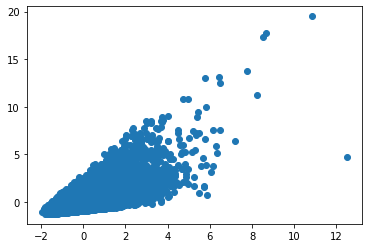

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

## Fórmula da Regressão Linear Simples

Agora nós criaremos a nossa fórmula para regressão linear simples. 

y = $b_0$ + $b_1$ * $x_1$

Onde:


*   y = previsão do preço de venda;
*   $b_0$ = constante, valor inicial;
*   $b_1$ = coeficiente, declive da linha;
*   $x_1$ = metragem quadrada.

## Construção do Modelo

In [59]:
import numpy as np
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

Importar o TensorFlow:

In [60]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

'2.2.0'

In [0]:
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

Como nós temos mais registro, faremos um processo diferente do exercício anterior. Vamos utilizar o conceito de placeholders.

In [0]:
batch_size = 32 # uma forma de segmentar o envio de dados para o processamento
xph = tf.placeholder(tf.float32, [batch_size, 1]) # metragem quadrada
yph = tf.placeholder(tf.float32, [batch_size, 1]) # preço da casa

Criação do modelo que irá representar as previsões:

In [0]:
y_modelo = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_modelo)

Criar o otimizador:

In [0]:
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.001)

Variável treinamento:

In [0]:
treinamento = otimizador.minimize(erro)

Inicializador das variáveis:

In [0]:
init = tf.global_variables_initializer()

Criar a sessão:

In [0]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(10000):
    # preencher os placeholders
    # fazer um sorteio dos indices que serão utilizados
    # retornará uma lista com 32 índices
    indices = np.random.randint(len(x), size=batch_size) # irá selecionar um número entre 0 e 21612
    feed = {xph: x[indices], yph: y[indices]}
    sess.run(treinamento, feed_dict=feed)
  b0_final, b1_final = sess.run([b0, b1])

In [68]:
print(b0_final)
print(b1_final)

-0.0030732856
0.69893813


## Fazendo algumas previsões

In [0]:
previsoes = b0_final + b1_final * x

In [70]:
print(previsoes)

[[-0.68791734]
 [ 0.3699041 ]
 [-0.99993662]
 ...
 [-0.80968096]
 [-0.36828784]
 [-0.80968096]]


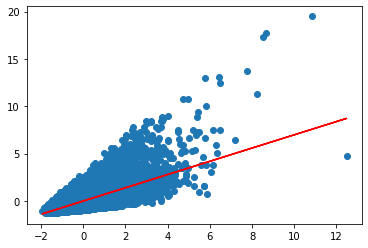

In [71]:
plt.plot(x, y, 'o')
plt.plot(x, previsoes, color='red')

Para termos uma visão melhor de como esse algoritmo está se comportando com relação aos erros:

In [0]:
y1 = scaler_y.inverse_transform(y)
previsoes1 = scaler_y.inverse_transform(previsoes)

### Cálculo do Mean Absolute Error

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)
print(mae)
print(mse)

173392.88201431488
68353852434.105515
